### Imports

In [24]:
import pandas as pd
import matplotlib
import numpy as np
import pypsa
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import geopandas as gpd

from utils import market_values, market_values_links, market_values_by_time_index, market_values_links_con, congestion_rent_link, convert_ISO_3166_2_to_1, generation, generation_links, market_values_storage_units, generation_storage_units

# general variables
font1 = {'fontname':'Calibri'}
PLOT_DIR = 'C:/Users/Julian/Studies/Master/01 TU Berlin/3. Semester - Masterarbeit/MA Marktwerte FEE/data/plots/'

onshore_regions = gpd.read_file("../data/external/regions_onshore_elec_s_181.geojson")
offshore_regions = gpd.read_file("../data/external/regions_offshore_elec_s_181.geojson")
onshore_regions = onshore_regions.set_index('name')
offshore_regions = offshore_regions.set_index('name')
onshore_regions['coords'] = onshore_regions['geometry'].apply(lambda x: x.representative_point().coords[:])
onshore_regions['coords'] = [coords[0] for coords in onshore_regions['coords']]
onshore_regions["name"] = onshore_regions.index
offshore_regions['coords'] = offshore_regions['geometry'].apply(lambda x: x.representative_point().coords[:])
offshore_regions['coords'] = [coords[0] for coords in offshore_regions['coords']]
offshore_regions["name"] = offshore_regions.index

In [2]:
n =pypsa.Network("../data/raw/elec_s_181_lv1.0__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10-noH2network_2030.nc")

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version [0, 18, 1].

INFO:pypsa.io:Imported network elec_s_181_lv1.0__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10-noH2network_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


### General
- round trip efficiency of hydrogen


### Capacity

In [ ]:
index_h2stores = n.stores[n.stores.carrier == "H2"].index

In [25]:
onshore_regions

,geometry,coords,name
name,,,
AL0 0,"POLYGON ((20.32207 39.91318, 20.39703 39.81809...","(20.00648437943388, 41.14563914300007)",AL0 0
AT0 0,"POLYGON ((16.45660 47.41184, 16.43396 47.39685...","(15.700718667666258, 47.896990619088925)",AT0 0
AT0 1,"POLYGON ((10.08288 47.35907, 10.20928 47.37248...","(10.379200993764837, 47.18231496200006)",AT0 1
AT0 2,"POLYGON ((13.47802 46.56357, 13.23111 46.55217...","(13.805469952867842, 47.57283376100011)",AT0 2
BA0 0,"POLYGON ((17.82716 42.85312, 17.81176 42.90986...","(17.97055162265331, 43.88773569750005)",BA0 0
...,...,...,...
SE3 5,"MULTIPOLYGON (((12.61378 61.54705, 12.41648 61...","(13.73128235630574, 63.53620046050007)",SE3 5
SE3 6,"POLYGON ((12.61573 56.75007, 12.59474 56.78799...","(12.822816168194691, 59.049790757500105)",SE3 6
SE3 7,"MULTIPOLYGON (((22.40528 65.54194, 22.39038 65...","(21.745513796594864, 66.5111868290001)",SE3 7


In [21]:
n.stores[n.stores.carrier == "H2"]

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,e_initial,e_min_pu,e_nom,e_nom_max,lifetime,...,e_nom_opt,type,e_nom_min,e_max_pu,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,build_year
Store,,,,,,,,,,,,,,,,,,,,,
DE0 0 H2 Store,DE0 0 H2,H2,True,True,140.161529,0.0,0.0,0.0,3.257629e+06,inf,...,5.008064e+05,,0.0,1.0,False,True,0.0,0.0,1.0,0
DE0 11 H2 Store,DE0 11 H2,H2,True,True,140.161529,0.0,0.0,0.0,3.464642e+08,inf,...,1.257958e+06,,0.0,1.0,False,True,0.0,0.0,1.0,0
DE0 15 H2 Store,DE0 15 H2,H2,True,True,140.161529,0.0,0.0,0.0,8.861846e+08,inf,...,1.833548e+06,,0.0,1.0,False,True,0.0,0.0,1.0,0
DE0 21 H2 Store,DE0 21 H2,H2,True,True,140.161529,0.0,0.0,0.0,2.866523e+07,inf,...,1.258530e+06,,0.0,1.0,False,True,0.0,0.0,1.0,0
DE0 23 H2 Store,DE0 23 H2,H2,True,True,140.161529,0.0,0.0,0.0,1.576804e+08,inf,...,5.705198e+05,,0.0,1.0,False,True,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE3 5 H2 Store,SE3 5 H2,H2,True,True,4117.636382,0.0,0.0,0.0,inf,inf,...,8.884398e+02,,0.0,1.0,False,True,0.0,0.0,1.0,0
SE3 6 H2 Store,SE3 6 H2,H2,True,True,4117.636382,0.0,0.0,0.0,inf,inf,...,1.235597e+03,,0.0,1.0,False,True,0.0,0.0,1.0,0
SE3 7 H2 Store,SE3 7 H2,H2,True,True,4117.636382,0.0,0.0,0.0,inf,inf,...,5.896688e+02,,0.0,1.0,False,True,0.0,0.0,1.0,0


In [27]:
n.stores

,bus,carrier,e_nom_extendable,e_cyclic,capital_cost,e_initial,e_min_pu,e_nom,e_nom_max,lifetime,...,e_nom_opt,type,e_nom_min,e_max_pu,e_initial_per_period,e_cyclic_per_period,p_set,q_set,sign,build_year
Store,,,,,,,,,,,,,,,,,,,,,
co2 atmosphere,co2 atmosphere,co2,True,False,0.000000,0.0,-1.0,0.0,inf,inf,...,3.931254e+07,,0.0,1.0,False,True,0.0,0.0,1.0,0
co2 stored,co2 stored,co2 stored,True,False,20.000000,0.0,0.0,0.0,inf,inf,...,2.000000e+08,,0.0,1.0,False,True,0.0,0.0,1.0,0
EU gas Store,EU gas,gas,True,True,0.000000,0.0,0.0,0.0,inf,inf,...,1.652130e+09,,0.0,1.0,False,True,0.0,0.0,1.0,0
DE0 0 H2 Store,DE0 0 H2,H2,True,True,140.161529,0.0,0.0,0.0,3.257629e+06,inf,...,5.008064e+05,,0.0,1.0,False,True,0.0,0.0,1.0,0
DE0 11 H2 Store,DE0 11 H2,H2,True,True,140.161529,0.0,0.0,0.0,3.464642e+08,inf,...,1.257958e+06,,0.0,1.0,False,True,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE3 5 home battery,SE3 5 home battery,home battery,True,True,17410.953944,0.0,0.0,0.0,inf,25.0,...,5.305105e-01,,0.0,1.0,False,True,0.0,0.0,1.0,0
SE3 6 home battery,SE3 6 home battery,home battery,True,True,17410.953944,0.0,0.0,0.0,inf,25.0,...,4.583297e-01,,0.0,1.0,False,True,0.0,0.0,1.0,0
SE3 7 home battery,SE3 7 home battery,home battery,True,True,17410.953944,0.0,0.0,0.0,inf,25.0,...,5.920071e-01,,0.0,1.0,False,True,0.0,0.0,1.0,0


In [36]:
# Optimised nominal energy capacity outputed by OPF.
df = n.stores.e_nom_opt[index_h2stores]
df.index = df.index.map(n.stores.bus).map(n.buses.location)
onshore_regions["h2_cap"] = df

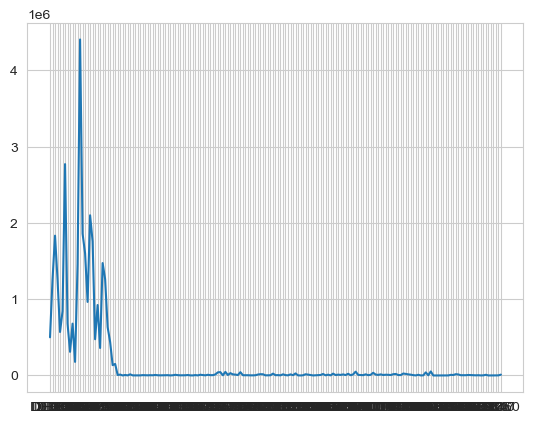

In [38]:
plt.plot(df)

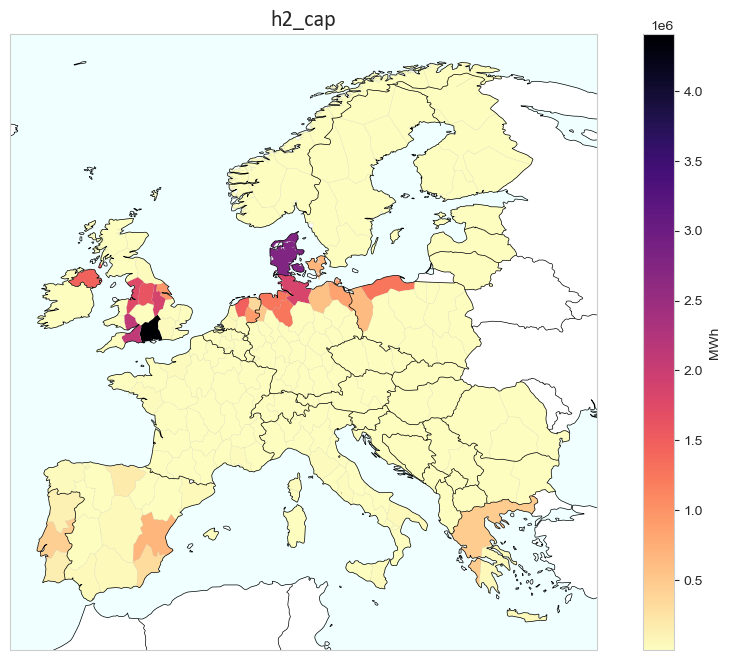

In [37]:
fig = plt.figure(figsize=(12, 8))
crs = ccrs.EqualEarth()

ax = plt.axes(projection=ccrs.EqualEarth())
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
ax.coastlines(edgecolor='black', linewidth=0.5)
ax.set_facecolor('white')
ax.add_feature(cartopy.feature.OCEAN, color='azure')
ax.set_title("h2_cap", fontsize=16, **font1)

onshore_regions.to_crs(crs.proj4_init).plot(column="h2_cap",
                     ax=ax,
                     cmap=plt.get_cmap("magma_r"),
                     linewidth=0.05,
                     edgecolor = 'grey',
                     legend=True,
                     legend_kwds={'label':"MWh",
                        'orientation': "vertical"})

plt.show()

### Storage Behavior

#### Feed-in and feed-out pattern

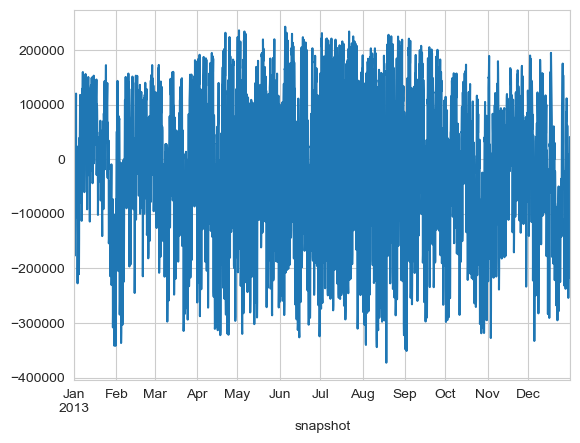

In [17]:
# Energy as calculated by the OPF.
n.stores_t.p[index_h2stores].sum(axis=1).plot()
plt.show()

#### Storage level over time

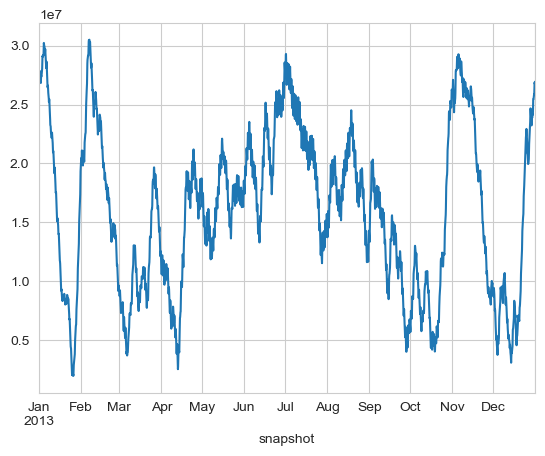

In [19]:
# Energy as calculated by the OPF.
n.stores_t.e[index_h2stores].sum(axis=1).plot()
plt.show()

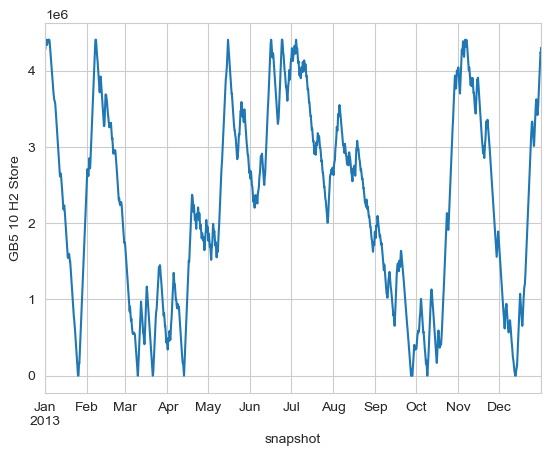

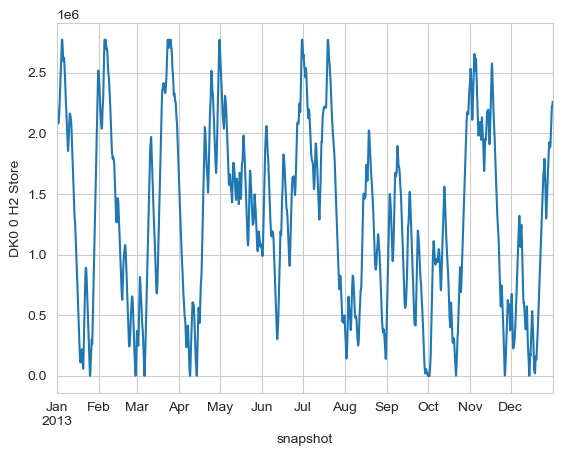

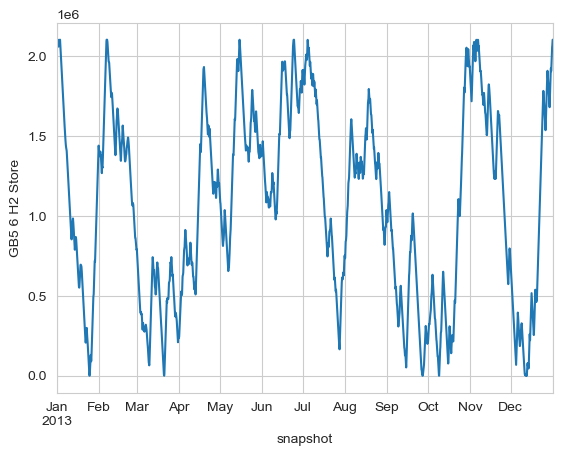

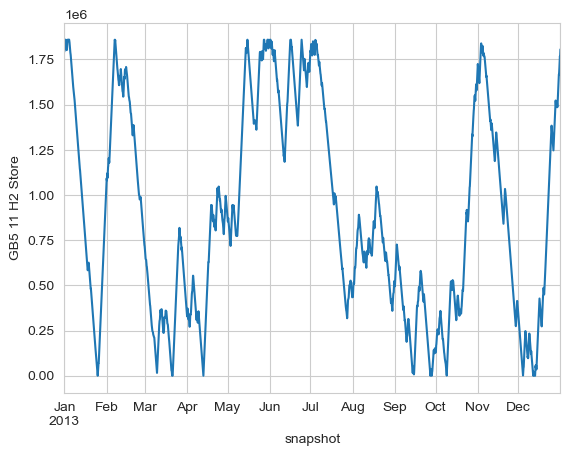

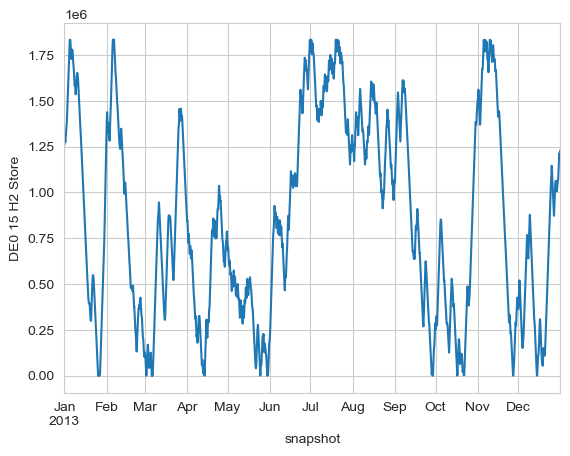

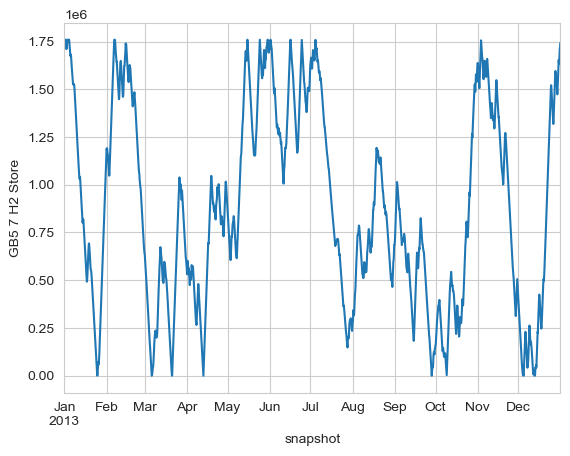

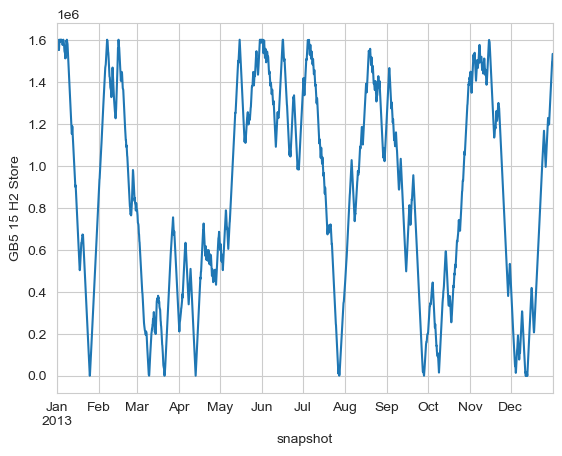

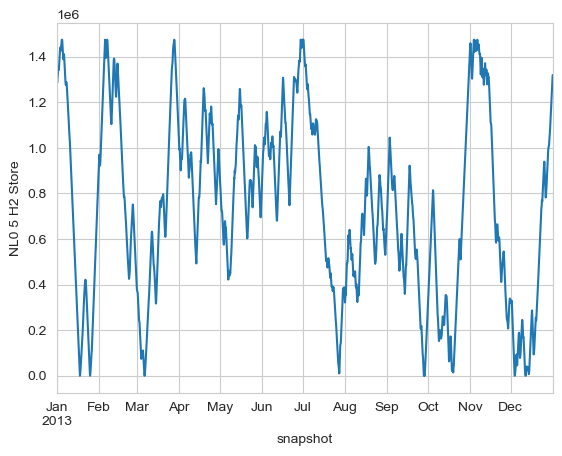

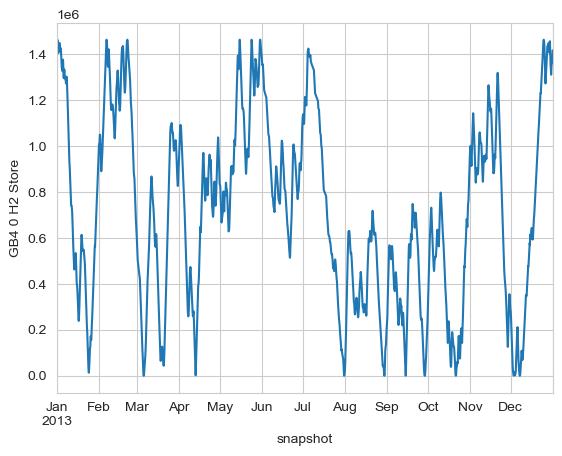

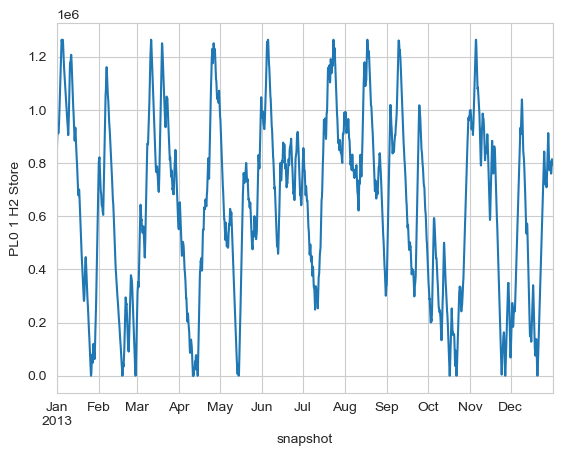

In [52]:
# storage level of 10 largest stores
index = n.stores.e_nom_opt[index_h2stores].sort_values(ascending=False).head(10).index

# yearly plot
for store in index:
    fig, ax = plt.subplots()
    n.stores_t.e[store].plot(ax=ax, ylabel=store)

## Ideas:
- Calc capacity factors / system load duration curves for electrolysis in different regions and try to investigate in differences (amount of wind generation, solar) Is only excess electrolysis consumed by electrolysis?
- Try to determine connection between electrolysis and excess solar / wind production
- Try to determine percent / amount of excess electricity that is used to produce hydrogen. (Basically all energy from renewables that went into electrolysis?)
- pie chart of percentage of electricity that is used directly, used for Electrolysis, battery, ... (startup script)
- Reproduce graph from Victoria, Zhu et al. 2019 – The role of storage technologies (in hydrogen word document); try to find patterns within the charging of battery and the charging with hydrogen (electrolysis -> fuel cell)
-